In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('dark')

In [2]:
sanbul = pd.read_csv('C:\project22\python\month_place_sanbul.csv', encoding = 'euc-kr')

sanbul.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [3]:
wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

wether_2 = pd.read_csv('C:\project22\python\OBS_AWS_DD_20220714142558.csv', encoding = 'euc-kr')
wether_2.drop(['지점'], axis=1, inplace=True)

index_name = ['stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'sumRn', 'maxInsWs', 'maxInsWsHrmt', 'avgWs', 'maxInsWsWd']
wether_2.columns = index_name

wether.loc[wether['stnNm'] == '정선군', 'stnNm'] = '정선'

C:\Users\user\AppData\Local\Temp\ipykernel_15112\2276106963.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')


In [4]:
wether.describe()

,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,...,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,sumFogDur
count,100571.000000,100623.00000,100623.000000,100615.000000,100616.000000,24168.000000,17345.000000,24161.000000,17906.000000,9681.000000,...,31045.000000,16461.000000,16464.000000,14599.000000,14596.000000,14592.000000,26809.000000,30183.000000,6679.000000,2478.000000
mean,12.175302,7.23787,927.682796,17.801757,1341.836775,1.648378,1126.631191,4.064579,1107.949235,6.136476,...,14.357845,14.646941,14.899994,15.177224,15.472492,15.392791,2.686411,3.678170,8.937311,4.729229
std,9.905357,10.45775,794.769153,10.027163,339.906714,2.660207,755.564639,6.873044,758.422447,6.433803,...,9.302701,8.588411,6.865433,5.610720,3.347257,1.738567,1.584593,2.242483,19.251118,4.485231
min,-19.700000,-27.70000,1.000000,-15.200000,0.000000,0.000000,-235.000000,0.000000,-235.000000,0.030000,...,-5.300000,-0.600000,2.000000,2.700000,7.900000,11.200000,0.000000,0.100000,0.000000,0.080000
25%,3.900000,-1.20000,447.000000,9.400000,1302.000000,0.200000,427.000000,0.200000,416.000000,1.500000,...,5.600000,6.800000,8.800000,10.200000,12.700000,14.400000,1.400000,1.900000,0.000000,1.330000
50%,13.100000,7.50000,609.000000,19.200000,1420.000000,0.500000,1125.000000,1.500000,1116.000000,4.170000,...,15.000000,15.300000,15.200000,15.400000,15.400000,15.500000,2.400000,3.200000,1.500000,3.330000
75%,20.600000,16.40000,901.500000,26.000000,1516.000000,2.000000,1812.000000,5.000000,1803.000000,9.080000,...,22.800000,22.500000,21.200000,20.300000,18.600000,16.800000,3.700000,5.100000,9.000000,6.580000
max,34.100000,30.90000,2400.000000,41.000000,2400.000000,26.100000,2356.000000,104.500000,2359.000000,283.000000,...,33.800000,31.900000,28.000000,26.500000,29.700000,22.200000,12.800000,18.200000,318.700000,24.000000


In [5]:
# 산불발생 날, 장소와 날씨 합치기 위한 기준열 만들어주기
sanbul['day_place'] = sanbul['tm'] + sanbul['발생장소_시군구']
wether['day_place'] = wether['tm'] + wether['stnNm']

# 데이터 합치기
sanbul_wether = pd.merge(wether, sanbul, on = 'day_place')

sanbul_wether.rename(columns = {'피해면적_합계' : 'damaged_area'}, inplace=True)

In [6]:
# 발생월, 시도 추출 = 03경북, 04강원, 03강원
sanbul_wether['month_count'] = str(sanbul_wether['발생일시_월']) + sanbul_wether['발생장소_시도']

# 기준년월과 지역 코드 합친 기준열 만들기
for i in range(len(sanbul_wether)):
    day = str(sanbul_wether.loc[i, '발생일시_월'])
    place = sanbul_wether.loc[i, '발생장소_시도']
    sanbul_wether.loc[i, 'month_count'] = day + place


condition = (sanbul_wether.발생일시_월 == 2) | (sanbul_wether.발생일시_월 == 3) | (sanbul_wether.발생일시_월 == 4)| (sanbul_wether.발생일시_월 == 5)
sanbul_high = sanbul_wether[condition]

In [7]:
# 날씨데이터 없는 열 제거
# df_new_drop = sanbul_wether.dropna(axis = 1)

df_new_drop = sanbul_high.dropna(axis = 1)

weather_g = df_new_drop.groupby('month_count').agg(["mean"])
count_g = df_new_drop.groupby('month_count').count()


# weather_g = sanbul_wether.groupby('month_count').agg(["mean"])
# count_g = sanbul_wether.groupby('month_count').count()

count_df = count_g[['avgTa']]
count_df.columns = ['count']

df_new = pd.concat([weather_g, count_df], axis=1)
# 데이터 없는 열 제거
# df_new = df_new.dropna(axis = 1)

df_new

C:\Users\user\AppData\Local\Temp\ipykernel_15112\2194179642.py:6: FutureWarning: ['stnNm', 'tm_x', 'day_place', '발생일시_시간', '발생일시_요일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구', '발생원인_구분', '발생원인_세부원인', 'tm_y'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  weather_g = df_new_drop.groupby('month_count').agg(["mean"])


,"(avgTa, mean)","(minTa, mean)","(minTaHrmt, mean)","(maxTa, mean)","(maxTaHrmt, mean)","(maxInsWs, mean)","(maxInsWsWd, mean)","(maxInsWsHrmt, mean)","(maxWs, mean)","(maxWsWd, mean)",...,"(발생일시_월, mean)","(발생일시_일, mean)","(진화종료시간_년, mean)","(진화종료시간_월, mean)","(진화종료시간_일, mean)","(damaged_area, mean)","(rank, mean)","(radio, mean)","(cumulative, mean)",count
month_count,,,,,,,,,,,,,,,,,,,,,
2강원,-0.010000,-5.616667,864.433333,6.293333,1425.133333,7.673333,256.333333,1419.366667,4.140000,252.666667,...,2.0,15.100000,2017.466667,2.000000,15.133333,0.349333,812.300000,0.003624,99.159602,30
2경북,1.230769,-4.553846,976.173077,7.761538,1419.288462,8.998077,258.269231,1118.461538,5.253846,253.269231,...,2.0,12.288462,2017.942308,2.000000,12.326923,6.519615,819.807692,0.067634,98.603587,52
3강원,6.700000,-0.817021,739.478723,14.638298,1461.244681,8.345745,249.468085,1437.957447,4.568085,249.574468,...,3.0,16.202128,2016.372340,3.000000,16.255319,2.992234,735.468085,0.031041,98.539821,94
3경북,8.135417,-0.088542,858.468750,16.241667,1473.093750,9.630208,255.729167,1416.854167,5.657292,248.020833,...,3.0,16.656250,2016.947917,3.000000,16.718750,1.841667,782.770833,0.019105,98.795751,96
4강원,13.761538,5.610989,735.626374,21.657143,1479.329670,8.856044,222.527473,1470.274725,4.805495,222.857143,...,4.0,16.923077,2016.604396,4.000000,17.010989,18.492088,744.598901,0.191836,97.968601,91
4경북,13.300000,5.177922,734.012987,21.089610,1467.467532,9.128571,241.298701,1311.402597,5.363636,227.142857,...,4.0,13.259740,2017.402597,4.000000,13.337662,25.920130,853.000000,0.268894,98.060475,77
5강원,17.875641,9.991026,624.833333,25.655128,1457.961538,8.576923,238.205128,1425.461538,4.732051,237.179487,...,5.0,10.820513,2016.256410,5.012821,10.500000,3.496410,900.179487,0.036272,99.109052,78
5경북,19.453333,11.762222,582.288889,26.942222,1401.444444,8.926667,244.000000,1250.600000,5.262222,236.000000,...,5.0,17.800000,2015.733333,5.000000,17.933333,0.843111,816.633333,0.008746,98.963293,45


In [13]:
# df_new.iloc[:, :23]
# df_new.iloc[:, [29]]
# df_new.iloc[:, [-1]]

df_new_corr = pd.concat([df_new.iloc[:, :28], df_new.iloc[:, [-1]]], axis = 1)

,"(발생일시_년, mean)"
month_count,
2강원,2017.466667
2경북,2017.942308
3강원,2016.372340
3경북,2016.947917
4강원,2016.604396
4경북,2017.402597
5강원,2016.256410
5경북,2015.733333


In [11]:
# df_new_corr.corr()

<AxesSubplot:>

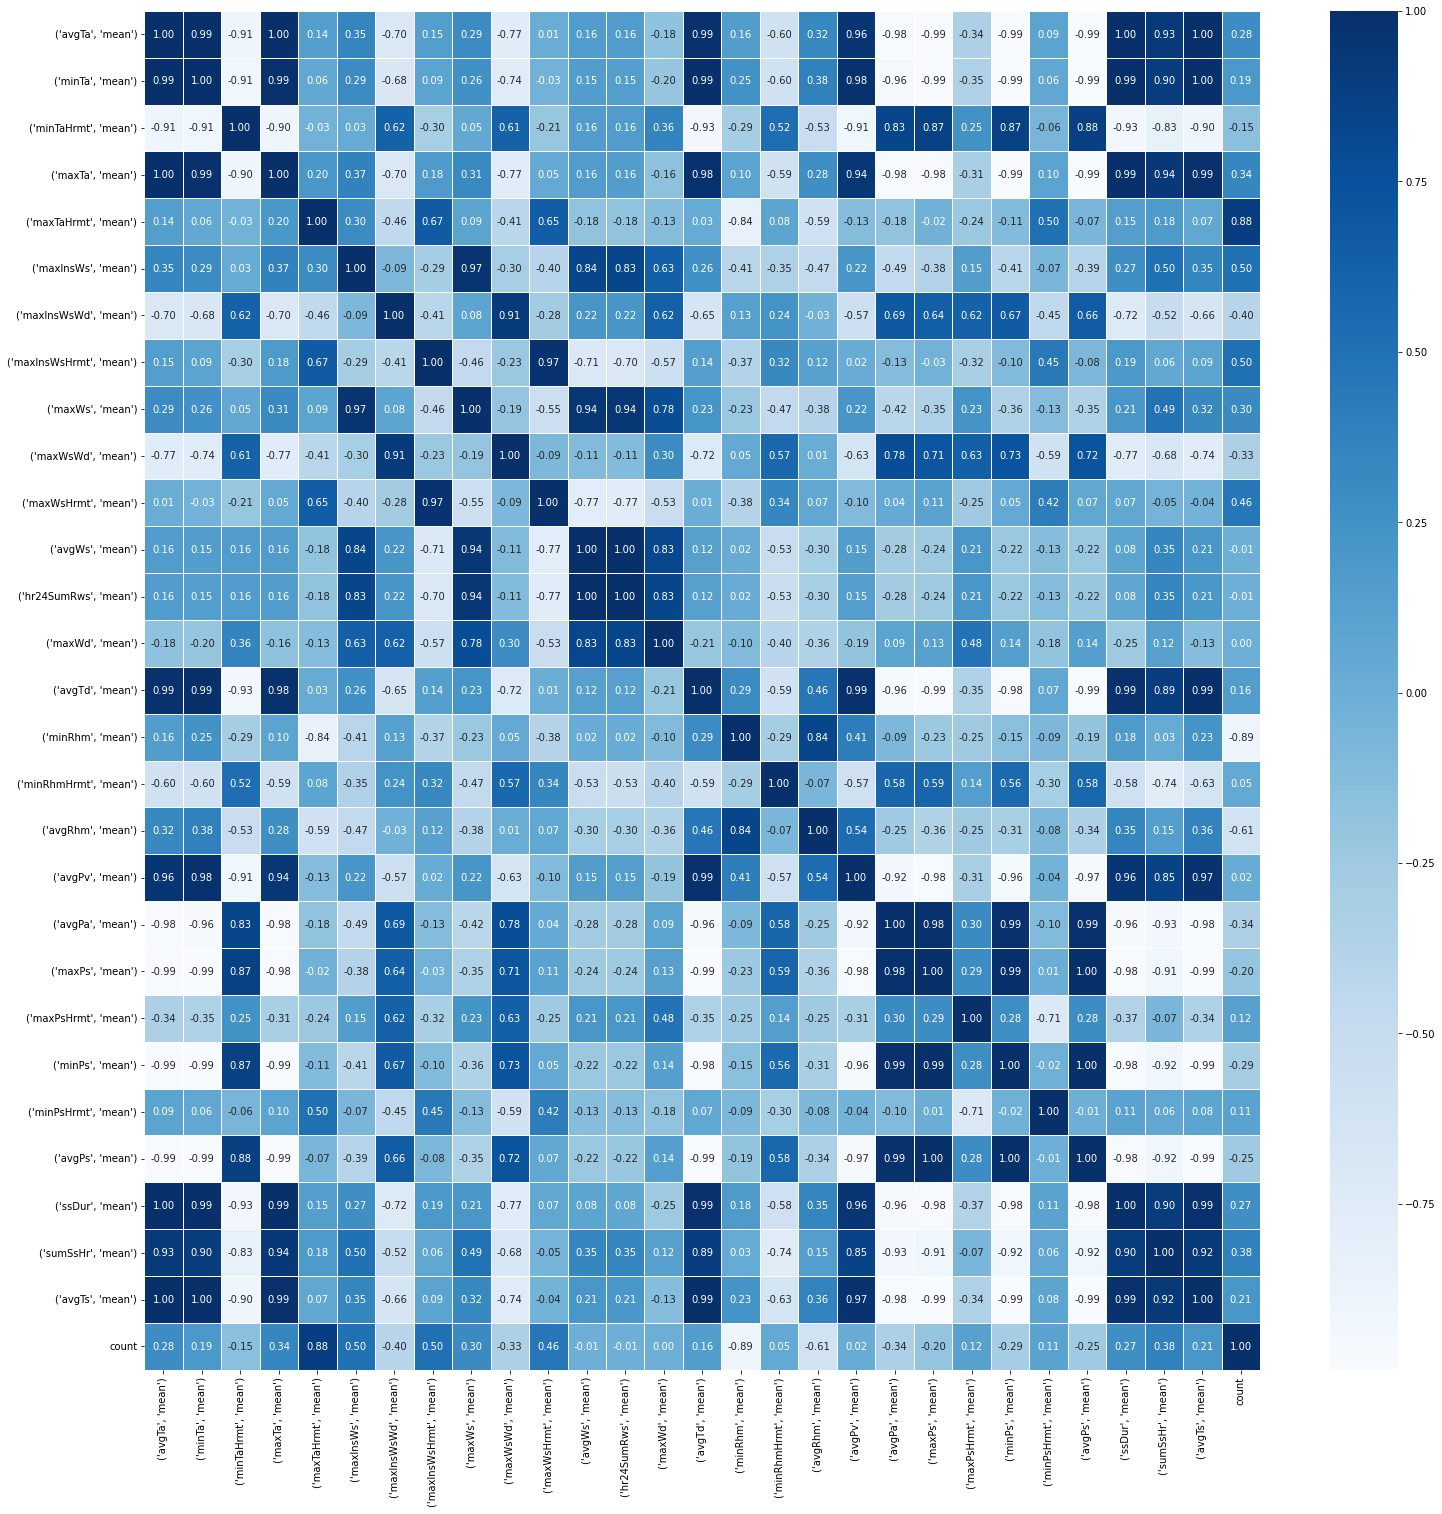

In [10]:
# 히트맵 그려보기
plt.figure(figsize=(25, 25))
sns.heatmap(data = df_new_corr.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')